In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
path = "gdrive/My Drive/Colab Notebooks/Tensorflow 2 and Keras/Deployment/iris.csv"

In [9]:
iris = pd.read_csv(path)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
X = iris.drop("species", axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y = iris["species"]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [12]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelBinarizer

In [14]:
encoder = LabelBinarizer()

In [15]:
y = encoder.fit_transform(y)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [37]:
scaler = MinMaxScaler()

In [38]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [39]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
model = Sequential()
model.add(Dense(units=4, activation="relu", input_shape=[4,]))
model.add(Dense(3, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(patience=10)

In [44]:
model.fit(scaled_X_train, y_train, epochs=10000, validation_data=(scaled_X_test,y_test), callbacks=[early_stop])

Epoch 1/10000
4/4 [==============================] - 0s 32ms/step - loss: 1.2757 - accuracy: 0.3333 - val_loss: 1.1830 - val_accuracy: 0.3333
Epoch 2/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2659 - accuracy: 0.3333 - val_loss: 1.1769 - val_accuracy: 0.3333
Epoch 3/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2569 - accuracy: 0.3333 - val_loss: 1.1713 - val_accuracy: 0.3333
Epoch 4/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2482 - accuracy: 0.3333 - val_loss: 1.1664 - val_accuracy: 0.3333
Epoch 5/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2408 - accuracy: 0.3333 - val_loss: 1.1622 - val_accuracy: 0.4000
Epoch 6/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2339 - accuracy: 0.3417 - val_loss: 1.1586 - val_accuracy: 0.4000
Epoch 7/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2274 - accuracy: 0.3333 - val_loss: 1.1554 - val_accuracy: 0.4000
Epoch 8/1000

In [45]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.275651,0.333333,1.182976,0.333333
1,1.265899,0.333333,1.176854,0.333333
2,1.256869,0.333333,1.171310,0.333333
3,1.248165,0.333333,1.166441,0.333333
4,1.240850,0.333333,1.162227,0.400000
...,...,...,...,...
1128,0.107743,0.975000,0.158795,0.933333
1129,0.107476,0.975000,0.158258,0.933333
1130,0.107240,0.975000,0.158091,0.933333
1131,0.107172,0.975000,0.158000,0.933333


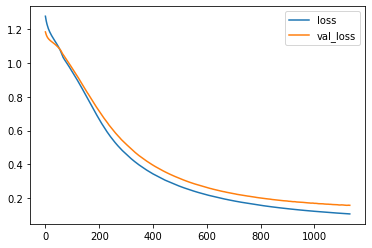

In [46]:
metrics[["loss", "val_loss"]].plot()

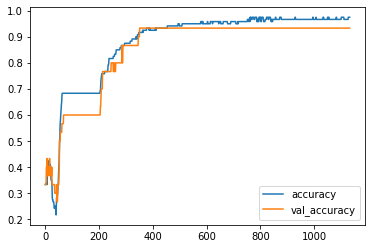

In [47]:
metrics[["accuracy", "val_accuracy"]].plot()

In [48]:
model.evaluate(scaled_X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.1580 - accuracy: 0.9333


[0.1579797863960266, 0.9333333373069763]

In [49]:
epochs = len(metrics)
epochs

1133

In [50]:
scaled_X = scaler.fit_transform(X)

In [51]:
model = Sequential()
model.add(Dense(units=4, activation="relu", input_shape=[4,]))
model.add(Dense(3, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
model.fit(scaled_X, y, epochs=epochs)

Epoch 1/1133
5/5 [==============================] - 0s 1ms/step - loss: 1.2812 - accuracy: 0.3333
Epoch 2/1133
5/5 [==============================] - 0s 2ms/step - loss: 1.2665 - accuracy: 0.3333
Epoch 3/1133
5/5 [==============================] - 0s 2ms/step - loss: 1.2532 - accuracy: 0.3333
Epoch 4/1133
5/5 [==============================] - 0s 1ms/step - loss: 1.2410 - accuracy: 0.3333
Epoch 5/1133
5/5 [==============================] - 0s 1ms/step - loss: 1.2280 - accuracy: 0.3333
Epoch 6/1133
5/5 [==============================] - 0s 1ms/step - loss: 1.2162 - accuracy: 0.3333
Epoch 7/1133
5/5 [==============================] - 0s 1ms/step - loss: 1.2042 - accuracy: 0.3333
Epoch 8/1133
5/5 [==============================] - 0s 1ms/step - loss: 1.1919 - accuracy: 0.3333
Epoch 9/1133
5/5 [==============================] - 0s 1ms/step - loss: 1.1815 - accuracy: 0.3400
Epoch 10/1133
5/5 [==============================] - 0s 1ms/step - loss: 1.1713 - accuracy: 0.3533
Epoch 11/1133
5/5 [

In [53]:
model.save("final_iris_model.h5")

In [54]:
import joblib

In [55]:
joblib.dump(scaler, "iris_scaler.pkl")

['iris_scaler.pkl']

In [56]:
from tensorflow.keras.models import load_model

In [57]:
flower_model = load_model("final_iris_model.h5")

In [58]:
flower_scaler = joblib.load("iris_scaler.pkl")

In [61]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [59]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [60]:
flower_example = {"sepal_length": 5.1, "sepal_width": 3.5, "petal_length":1.4, "petal_width":0.2}

In [67]:
def return_prection(model, scaler, sample_json):

  classes = np.array(['setosa', 'versicolor', 'virginica'])

  s_len = sample_json["sepal_length"]
  s_wid = sample_json["sepal_width"]
  p_len = sample_json["petal_length"]
  p_wid = sample_json["petal_width"]

  flower = scaler.transform([[s_len, s_wid, p_len, p_wid]])

  clas_ind = model.predict_classes(flower)

  return classes[clas_ind[0]]

In [68]:
return_prection(flower_model, flower_scaler, flower_example)

'setosa'

In [70]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib

flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

def return_prection(model, scaler, sample_json):

  classes = np.array(['setosa', 'versicolor', 'virginica'])

  s_len = sample_json["sepal_length"]
  s_wid = sample_json["sepal_width"]
  p_len = sample_json["petal_length"]
  p_wid = sample_json["petal_width"]

  flower = scaler.transform([[s_len, s_wid, p_len, p_wid]])

  clas_ind = model.predict_classes(flower)

  return classes[clas_ind[0]]